In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 3.7MB/s 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_file
import pandas as pd

In [ ]:
!unzip -q "/content/gdrive/My Drive/GL_AIML/Kaggle/rsna-pneumonia-detection-challenge.zip"

In [ ]:
train_files_path = '/content/stage_2_train_images'
test_files_path = '/content/stage_2_test_images'

In [ ]:
import os
train_file_names = os.listdir(train_files_path)
test_file_names = os.listdir(test_files_path)

In [ ]:
print('Number of training images we have: '+ str(len(train_file_names)))
print('Number of testing images we have: '+ str(len(test_file_names)))

Number of training images we have: 26684
Number of testing images we have: 3000


In [ ]:
train_patient_ids = []
for file_name in train_file_names:
    name,extn = file_name.split('.')
    train_patient_ids.append(name)
    if(extn != 'dcm'):
        print(name+' is not a dcm file')

In [ ]:
train_patient_ids[0:5]

['e77a7c87-8989-4dcc-8dc4-2e7cc98a5cc5',
 '3fd5687e-bc16-4802-a44e-163f667882e4',
 'e8fe76e2-fef3-4d7b-8678-26fb32573f82',
 '34033f0c-2a11-41f0-bd6b-116d3a2c3495',
 'a6cbb3dd-75ab-4671-a6b0-9a51c04a81ec']

In [ ]:
test_patient_ids = []
for file_name in test_file_names:
    name,extn = file_name.split('.')
    test_patient_ids.append(name)
    if(extn != 'dcm'):
        print(name+' is not a dcm file')

In [ ]:
test_patient_ids[0:5]

['2a545588-c287-4124-88d1-7a17032d5cb3',
 'c172bbde-f7f7-4e65-aeb9-98684feddbbd',
 '0f1e9b1c-d6da-4897-a9cf-ae987927797e',
 '206f38dc-9b8a-4559-aaf7-b612fbd06ede',
 '12d70948-c153-45bd-9942-e6cc07d54d07']

In [ ]:
train_patient_ids.sort()
test_patient_ids.sort()

In [ ]:
train_patient_ids[0:5]

['0004cfab-14fd-4e49-80ba-63a80b6bddd6',
 '000924cf-0f8d-42bd-9158-1af53881a557',
 '000db696-cf54-4385-b10b-6b16fbb3f985',
 '000fe35a-2649-43d4-b027-e67796d412e0',
 '001031d9-f904-4a23-b3e5-2c088acd19c6']

In [ ]:
test_patient_ids[0:5]

['0000a175-0e68-4ca4-b1af-167204a7e0bc',
 '0005d3cc-3c3f-40b9-93c3-46231c3eb813',
 '000686d7-f4fc-448d-97a0-44fa9c5d3aa6',
 '000e3a7d-c0ca-4349-bb26-5af2d8993c3d',
 '00100a24-854d-423d-a092-edcf6179e061']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_file
import pandas as pd

e77a7c87-8989-4dcc-8dc4-2e7cc98a5cc5.dcm


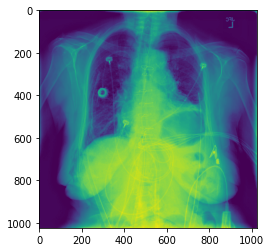

In [ ]:
train_example1 =  pydicom.dcmread(train_files_path+'/'+train_file_names[0])
print(train_file_names[0])
plt.imshow(train_example1.pixel_array)

In [ ]:
print(train_example1)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.23283.1517874447.220653
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.23283.1517874447.220653
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

b65e8f4d-3b6f-44c5-b7cb-f967a8c70c01.dcm


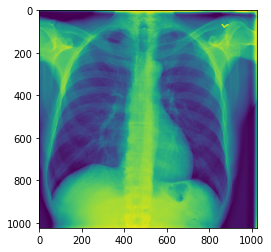

In [ ]:
train_example1 =  pydicom.dcmread(train_files_path+'/'+train_file_names[8])
print(train_file_names[8])
plt.imshow(train_example1.pixel_array)

In [ ]:
print(train_example1)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.25363.1517874464.446502
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.25363.1517874464.446502
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

160786ef-dd0f-4c51-8268-b6faa3cfe59b.dcm


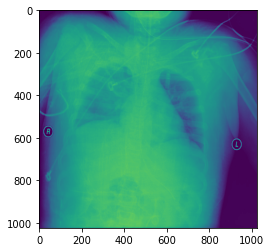

In [ ]:
train_example1 =  pydicom.dcmread(train_files_path+'/'+train_file_names[14])
print(train_file_names[14])
plt.imshow(train_example1.pixel_array)

In [ ]:
print(train_example1)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.29134.1517874489.831761
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.29134.1517874489.831761
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time      

In [ ]:
train_male_count = 0
train_female_count = 0
for file_name in train_patient_ids:
    train_example =  pydicom.dcmread(train_files_path+'/'+file_name+'.dcm')
    if(train_example[0x0010,0x0040].value == 'M'):
        train_male_count = train_male_count + 1
    if(train_example[0x0010,0x0040].value == 'F'):
        train_female_count = train_female_count + 1

In [ ]:
print('Number of male patients in training set:'+str(train_male_count))
print('Number of female patients in training set:'+str(train_female_count))
print('Total number of patients in training set:'+str(train_male_count+train_female_count))

Number of male patients in training set:15166
Number of female patients in training set:11518
Total number of patients in training set:26684


In [ ]:
test_male_count = 0
test_female_count = 0
for file_name in test_patient_ids:
    test_example =  pydicom.dcmread(test_files_path+'/'+file_name+'.dcm')
    if(test_example[0x0010,0x0040].value == 'M'):
        test_male_count = test_male_count + 1
    if(test_example[0x0010,0x0040].value == 'F'):
        test_female_count = test_female_count + 1

In [ ]:
print('Number of male patients in testing set:'+str(test_male_count))
print('Number of female patients in testing set:'+str(test_female_count))
print('Total number of patients in testing set:'+str(test_male_count+test_female_count))

Number of male patients in testing set:1714
Number of female patients in testing set:1286
Total number of patients in testing set:3000


In [ ]:
train_values_g = [train_male_count,train_female_count]
test_values_g = [test_male_count,test_female_count]

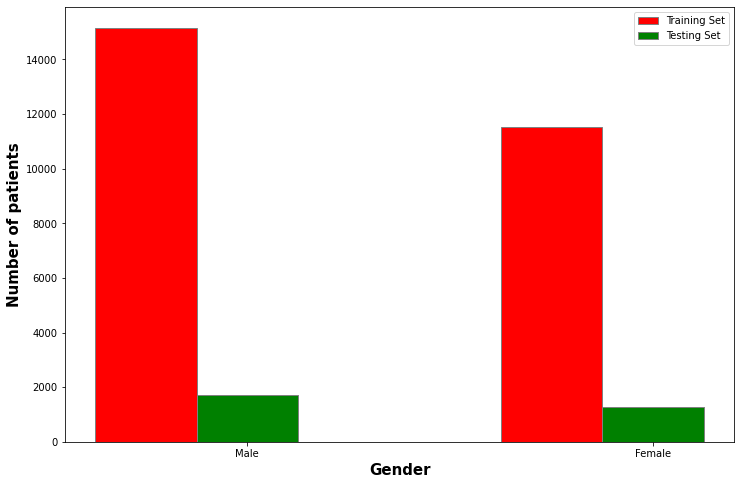

In [ ]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
br1 = np.arange(len(train_values_g))
br2 = [x + barWidth for x in br1]
plt.bar(br1, train_values_g, color ='r', width = barWidth,
        edgecolor ='grey', label ='Training Set')
plt.bar(br2, test_values_g, color ='g', width = barWidth,
        edgecolor ='grey', label ='Testing Set')
plt.xlabel('Gender', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of patients', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train_values_g))],
        ['Male','Female'])
plt.legend()

In [ ]:
print("Percentage of Males data in training set:"+str(100*train_male_count/(train_male_count+train_female_count)))
print("Percentage of Females data in training set:"+str(100*train_female_count/(train_male_count+train_female_count)))

Percentage of Males data in training set:56.835556888022786
Percentage of Females data in training set:43.164443111977214


In [ ]:
print("Percentage of Males data in testing set:"+str(100*test_male_count/(test_male_count+test_female_count)))
print("Percentage of Females data in testing set:"+str(100*test_female_count/(test_male_count+test_female_count)))

Percentage of Males data in testing set:57.13333333333333
Percentage of Females data in testing set:42.86666666666667


In [ ]:
train_labels_df = pd.read_csv('/content/stage_2_train_labels.csv',index_col = 'patientId')

In [ ]:
train_labels_df.sort_values("patientId", inplace = True)

In [ ]:
train_labels_df.head(10)

,x,y,width,height,Target
patientId,,,,,
0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
000924cf-0f8d-42bd-9158-1af53881a557,NaN,NaN,NaN,NaN,0
000db696-cf54-4385-b10b-6b16fbb3f985,316.0,318.0,170.0,478.0,1
000db696-cf54-4385-b10b-6b16fbb3f985,660.0,375.0,146.0,402.0,1
000fe35a-2649-43d4-b027-e67796d412e0,570.0,282.0,269.0,409.0,1
000fe35a-2649-43d4-b027-e67796d412e0,83.0,227.0,296.0,438.0,1
001031d9-f904-4a23-b3e5-2c088acd19c6,66.0,160.0,373.0,608.0,1
001031d9-f904-4a23-b3e5-2c088acd19c6,552.0,164.0,376.0,676.0,1
0010f549-b242-4e94-87a8-57d79de215fc,NaN,NaN,NaN,NaN,0


In [ ]:
train_labels_df.shape

(30227, 5)

In [ ]:
train_labels_classinfo = pd.read_csv('stage_2_detailed_class_info.csv',index_col = 'patientId')

In [ ]:
train_labels_classinfo.sort_values("patientId", inplace = True)

In [ ]:
train_labels_classinfo.head(10)

,class
patientId,
0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
000924cf-0f8d-42bd-9158-1af53881a557,Normal
000db696-cf54-4385-b10b-6b16fbb3f985,Lung Opacity
000db696-cf54-4385-b10b-6b16fbb3f985,Lung Opacity
000fe35a-2649-43d4-b027-e67796d412e0,Lung Opacity
000fe35a-2649-43d4-b027-e67796d412e0,Lung Opacity
001031d9-f904-4a23-b3e5-2c088acd19c6,Lung Opacity
001031d9-f904-4a23-b3e5-2c088acd19c6,Lung Opacity
0010f549-b242-4e94-87a8-57d79de215fc,Normal


In [ ]:
train_labels_classinfo.shape

(30227, 1)

In [ ]:
train_labels_df['class'] = train_labels_classinfo['class']

In [ ]:
train_labels_df.shape

(30227, 6)

In [ ]:
train_labels_df.head(10)

,x,y,width,height,Target,class
patientId,,,,,,
0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
000924cf-0f8d-42bd-9158-1af53881a557,NaN,NaN,NaN,NaN,0,Normal
000db696-cf54-4385-b10b-6b16fbb3f985,316.0,318.0,170.0,478.0,1,Lung Opacity
000db696-cf54-4385-b10b-6b16fbb3f985,660.0,375.0,146.0,402.0,1,Lung Opacity
000fe35a-2649-43d4-b027-e67796d412e0,570.0,282.0,269.0,409.0,1,Lung Opacity
000fe35a-2649-43d4-b027-e67796d412e0,83.0,227.0,296.0,438.0,1,Lung Opacity
001031d9-f904-4a23-b3e5-2c088acd19c6,66.0,160.0,373.0,608.0,1,Lung Opacity
001031d9-f904-4a23-b3e5-2c088acd19c6,552.0,164.0,376.0,676.0,1,Lung Opacity
0010f549-b242-4e94-87a8-57d79de215fc,NaN,NaN,NaN,NaN,0,Normal


In [ ]:
train_labels_df.loc[str(train_patient_ids[2])].shape

(2, 6)

In [ ]:
k=train_labels_df.loc[str(train_patient_ids[6])].values

In [ ]:
k

array([198.0, 375.0, 114.0, 206.0, 1, 'Lung Opacity'], dtype=object)

In [ ]:
from matplotlib.patches import Rectangle
def disp_xray(patient_id):
    train_example =  pydicom.dcmread(train_files_path+'/'+patient_id+'.dcm')
    print('Patient Id is :'+patient_id)
    plt.imshow(train_example.pixel_array,cmap='gray')
    if(train_labels_df.loc[str(patient_id)].shape == (6,)):
        if(train_labels_df.loc[str(patient_id)].Target == 1):
            roi = train_labels_df.loc[str(patient_id)].values
            plt.gca().add_patch(Rectangle((roi[0],roi[1]),roi[2],roi[3],linewidth=2,edgecolor='r',facecolor='none'))
    if(train_labels_df.loc[str(patient_id)].shape == (2,6)):
        roi = train_labels_df.loc[str(patient_id)].values
        plt.gca().add_patch(Rectangle((roi[0,0],roi[0,1]),roi[0,2],roi[0,3],linewidth=2,edgecolor='r',facecolor='none'))
        plt.gca().add_patch(Rectangle((roi[1,0],roi[1,1]),roi[1,2],roi[1,3],linewidth=2,edgecolor='r',facecolor='none'))

Patient Id is :0004cfab-14fd-4e49-80ba-63a80b6bddd6


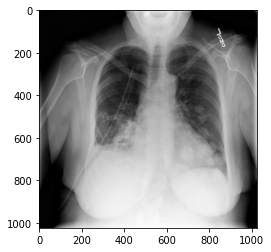

In [ ]:
disp_xray(str(train_patient_ids[0]))

Patient Id is :000924cf-0f8d-42bd-9158-1af53881a557


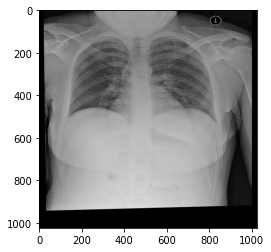

In [ ]:
disp_xray(str(train_patient_ids[1]))

Patient Id is :000db696-cf54-4385-b10b-6b16fbb3f985


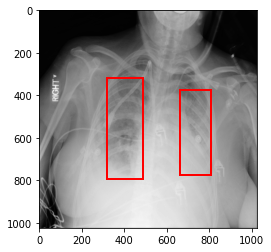

In [ ]:
disp_xray(str(train_patient_ids[2]))

Patient Id is :000fe35a-2649-43d4-b027-e67796d412e0


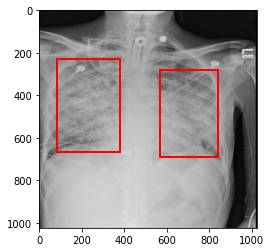

In [ ]:
disp_xray(str(train_patient_ids[3]))

Patient Id is :001031d9-f904-4a23-b3e5-2c088acd19c6


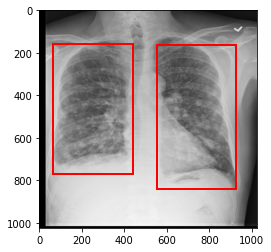

In [ ]:
disp_xray(str(train_patient_ids[4]))

Patient Id is :0010f549-b242-4e94-87a8-57d79de215fc


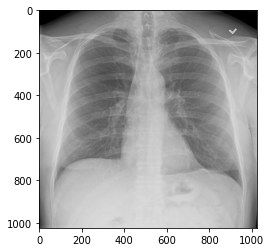

In [ ]:
disp_xray(str(train_patient_ids[5]))

Patient Id is :001916b8-3d30-4935-a5d1-8eaddb1646cd


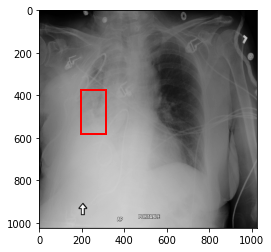

In [ ]:
disp_xray(str(train_patient_ids[6]))

In [ ]:
import seaborn as sns

In [ ]:
#sns.displot(train_age_data)

In [ ]:
def return_gender(patient_id):
  train_example =  pydicom.dcmread(train_files_path+'/'+patient_id+'.dcm')
  gender = train_example[0x0010,0x0040].value
  return gender
def return_age(patient_id):
  train_example =  pydicom.dcmread(train_files_path+'/'+patient_id+'.dcm')
  age = train_example[0x0010,0x1010].value
  return age

In [ ]:
train_labels_df2 = train_labels_df.copy(deep=True)
train_labels_df2.reset_index(inplace=True)
gender_data  = train_labels_df2['patientId'].apply(return_gender)
train_labels_df2['gender'] = gender_data
age_data = train_labels_df2['patientId'].apply(return_age)
train_labels_df2['age'] = age_data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


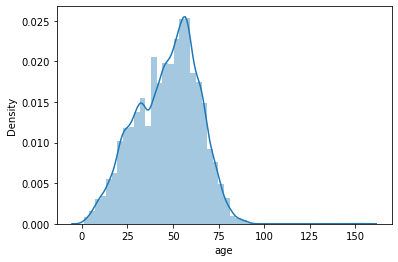

In [ ]:
sns.distplot(train_labels_df2['age'])

In [ ]:
patients_without_pnuemonia = train_labels_df2[train_labels_df2['Target']==0]
patients_with_pnuemonia = train_labels_df2[train_labels_df2['Target']==1]

In [ ]:
patients_without_pnuemonia.shape

(20672, 9)

In [ ]:
patients_with_pnuemonia.shape

(9555, 9)

In [ ]:
patients_with_pnuemonia = patients_with_pnuemonia.drop_duplicates(subset=["patientId"])

In [ ]:
patients_with_pnuemonia.describe()

,x,y,width,height,Target
count,6012.000000,6012.000000,6012.000000,6012.000000,6012.0
mean,384.972888,376.124085,215.997172,314.209082,1.0
std,203.803120,149.373537,59.329856,154.912499,0.0
min,2.000000,2.000000,40.000000,45.000000,1.0
25%,204.000000,257.000000,174.000000,193.000000,1.0
50%,303.500000,378.000000,214.000000,282.000000,1.0
75%,590.000000,487.000000,256.000000,417.000000,1.0
max,817.000000,881.000000,528.000000,942.000000,1.0


In [ ]:
patients_without_pnuemonia.describe()

,x,y,width,height,Target
count,0.0,0.0,0.0,0.0,20672.0
mean,NaN,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,NaN,0.0
max,NaN,NaN,NaN,NaN,0.0


In [ ]:
20672+6012

26684

In [ ]:
patients_with_pnuemonia.isna().any()

patientId    False
x            False
y            False
width        False
height       False
Target       False
class        False
gender       False
age          False
dtype: bool

In [ ]:
patients_without_pnuemonia.isna().any()

patientId    False
x             True
y             True
width         True
height        True
Target       False
class        False
gender       False
age          False
dtype: bool

In [ ]:
patients_with_pnuemonia.isnull().any()

patientId    False
x            False
y            False
width        False
height       False
Target       False
class        False
gender       False
age          False
dtype: bool

In [ ]:
patients_without_pnuemonia.isnull().any()

patientId    False
x             True
y             True
width         True
height        True
Target       False
class        False
gender       False
age          False
dtype: bool

In [ ]:
patients_with_pnuemonia.describe()

,x,y,width,height,Target
count,6012.000000,6012.000000,6012.000000,6012.000000,6012.0
mean,384.972888,376.124085,215.997172,314.209082,1.0
std,203.803120,149.373537,59.329856,154.912499,0.0
min,2.000000,2.000000,40.000000,45.000000,1.0
25%,204.000000,257.000000,174.000000,193.000000,1.0
50%,303.500000,378.000000,214.000000,282.000000,1.0
75%,590.000000,487.000000,256.000000,417.000000,1.0
max,817.000000,881.000000,528.000000,942.000000,1.0


In [ ]:
patients_without_pnuemonia.describe()

,x,y,width,height,Target
count,0.0,0.0,0.0,0.0,20672.0
mean,NaN,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,NaN,0.0
max,NaN,NaN,NaN,NaN,0.0


In [ ]:
patients_with_pnuemonia.groupby('gender').count()

,patientId,x,y,width,height,Target,class,age
gender,,,,,,,,
F,2502,2502,2502,2502,2502,2502,2502,2502
M,3510,3510,3510,3510,3510,3510,3510,3510


In [ ]:
patients_without_pnuemonia.groupby('gender').count()

,patientId,x,y,width,height,Target,class,age
gender,,,,,,,,
F,9016,0,0,0,0,9016,9016,9016
M,11656,0,0,0,0,11656,11656,11656


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


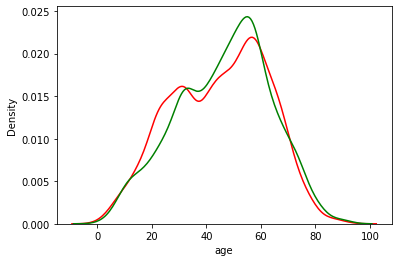

In [ ]:
sns.distplot(patients_with_pnuemonia[patients_with_pnuemonia['gender']=='M']['age'],color='r',hist=False)
sns.distplot(patients_with_pnuemonia[patients_with_pnuemonia['gender']=='F']['age'],color='green',hist=False)

In [ ]:
import cv2
X_train_downscaled = []
y_train = []
for i in range(len(train_patient_ids)):
  print('Processing image:'+str(i))
  patient_id = train_patient_ids[i]
  img_file_name = train_files_path+'/'+patient_id+'.dcm'
  img_dicom = pydicom.dcmread(img_file_name)
  img = img_dicom.pixel_array
  img_shape = img.shape
  mask_img = np.zeros((np.int_(img_shape[0]),np.int_(img_shape[1])))
  if(train_labels_df.loc[str(patient_id)].shape == (6,)):
    if(train_labels_df.loc[str(patient_id)].Target == 1):
      roi = train_labels_df.loc[str(patient_id)].values
      for r in range(int(roi[0])-1,int(roi[0])+int(roi[2])-2):
        for c in range(int(roi[1])-1,int(roi[1])+int(roi[3])-2):
          mask_img[c,r] = 2
  if(train_labels_df.loc[str(patient_id)].shape == (2,6)):
    roi = train_labels_df.loc[str(patient_id)].values
    for r in range(int(roi[0,0])-1,int(roi[0,0])+int(roi[0,2])-2):
      for c in range(int(roi[0,1])-1,int(roi[0,1])+int(roi[0,3])-2):
        mask_img[c,r] = 2
      for r in range(int(roi[1,0])-1,int(roi[1,0])+int(roi[1,2])-2):
        for c in range(int(roi[1,1])-1,int(roi[1,1])+int(roi[1,3])-2):
          mask_img[c,r] = 2
  mask_img_resized = cv2.resize(mask_img,(28,28))
  y_train.append(mask_img_resized)
  res_img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)  
  X_train_downscaled.append(res_img)

Streaming output truncated to the last 5000 lines.
Processing image:21684
Processing image:21685
Processing image:21686
Processing image:21687
Processing image:21688
Processing image:21689
Processing image:21690
Processing image:21691
Processing image:21692
Processing image:21693
Processing image:21694
Processing image:21695
Processing image:21696
Processing image:21697
Processing image:21698
Processing image:21699
Processing image:21700
Processing image:21701
Processing image:21702
Processing image:21703
Processing image:21704
Processing image:21705
Processing image:21706
Processing image:21707
Processing image:21708
Processing image:21709
Processing image:21710
Processing image:21711
Processing image:21712
Processing image:21713
Processing image:21714
Processing image:21715
Processing image:21716
Processing image:21717
Processing image:21718
Processing image:21719
Processing image:21720
Processing image:21721
Processing image:21722
Processing image:21723
Processing image:21724
Proces

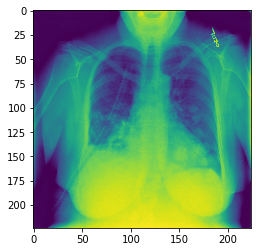

In [ ]:
plt.imshow(X_train_downscaled[0])

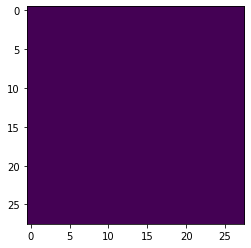

In [ ]:
plt.imshow(y_train[0])

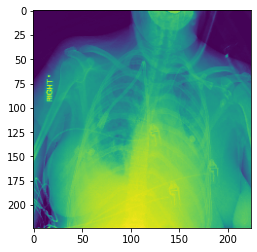

In [ ]:
plt.imshow(X_train_downscaled[2])

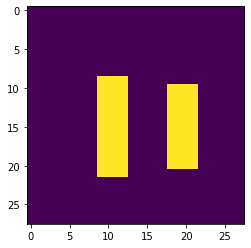

In [ ]:
plt.imshow(y_train[2])

In [ ]:
import pickle
with open('/content/gdrive/MyDrive/GL_AIML/Capstone_Project/resized_train_images.pkl','wb') as f: pickle.dump(X_train_downscaled, f)

In [ ]:
with open('/content/gdrive/MyDrive/GL_AIML/Capstone_Project/traIn_labels_mask.pkl','wb') as f: pickle.dump(y_train, f)

In [ ]:
import cv2
X_test_downscaled = []
print(len(test_patient_ids))
for i in range(len(test_patient_ids)):
  print('Processing image:'+str(i))
  patient_id = test_patient_ids[i]
  img_file_name = test_files_path+'/'+patient_id+'.dcm'
  img_dicom = pydicom.dcmread(img_file_name)
  img = img_dicom.pixel_array
  img_shape = img.shape
  res_img = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)  
  X_test_downscaled.append(res_img)

3000
Processing image:0
Processing image:1
Processing image:2
Processing image:3
Processing image:4
Processing image:5
Processing image:6
Processing image:7
Processing image:8
Processing image:9
Processing image:10
Processing image:11
Processing image:12
Processing image:13
Processing image:14
Processing image:15
Processing image:16
Processing image:17
Processing image:18
Processing image:19
Processing image:20
Processing image:21
Processing image:22
Processing image:23
Processing image:24
Processing image:25
Processing image:26
Processing image:27
Processing image:28
Processing image:29
Processing image:30
Processing image:31
Processing image:32
Processing image:33
Processing image:34
Processing image:35
Processing image:36
Processing image:37
Processing image:38
Processing image:39
Processing image:40
Processing image:41
Processing image:42
Processing image:43
Processing image:44
Processing image:45
Processing image:46
Processing image:47
Processing image:48
Processing image:49
Proce

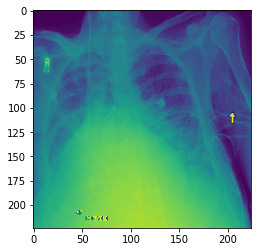

In [ ]:
plt.imshow(X_test_downscaled[0])

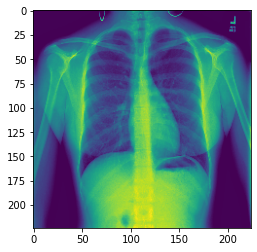

In [ ]:
plt.imshow(X_test_downscaled[2999])

In [ ]:
import pickle
with open('/content/gdrive/MyDrive/GL_AIML/Capstone_Project/test_resized_images.pkl','wb') as f: pickle.dump(X_test_downscaled, f)